In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


In [15]:
data = pd.read_csv("39-feature-vector.csv")
data

,class,0,1,2,3,4,5,6,7,8,...,29,30,31,32,33,34,35,36,37,38
0,anthrophony,0.626714,0.827684,0.930313,0.501803,0.542249,0.468979,0.318348,0.379219,0.426658,...,0.070683,0.079686,0.085407,0.084761,0.075187,0.072029,0.073790,0.079146,0.084986,0.092545
1,anthrophony,0.461087,0.744750,0.883125,0.514840,0.533231,0.482730,0.353830,0.435641,0.525935,...,0.128797,0.128452,0.136328,0.137922,0.135077,0.131882,0.124851,0.128193,0.128049,0.129284
2,anthrophony,0.390126,0.682046,0.955433,0.424473,0.592745,0.418916,0.387924,0.392779,0.492717,...,0.140188,0.133408,0.141130,0.136032,0.134554,0.134804,0.134235,0.133575,0.133459,0.136899
3,anthrophony,0.664164,0.821859,1.000000,0.475881,0.561929,0.409417,0.350974,0.338424,0.422630,...,0.041718,0.041547,0.050154,0.044924,0.036704,0.034917,0.036167,0.037872,0.044116,0.047740
4,anthrophony,0.359122,0.657137,0.954445,0.442800,0.623291,0.419816,0.392054,0.391199,0.492590,...,0.124112,0.118943,0.126383,0.119483,0.116559,0.116601,0.116413,0.116972,0.119721,0.124027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6599,other,0.230966,0.569598,0.795762,0.554628,0.642260,0.591072,0.436866,0.547585,0.436631,...,0.101700,0.102209,0.105817,0.106501,0.095956,0.095646,0.096040,0.097561,0.101006,0.108054
6600,other,0.222576,0.571416,0.786815,0.554614,0.633529,0.569845,0.417258,0.526320,0.420969,...,0.148462,0.142680,0.144562,0.144662,0.132111,0.130482,0.134250,0.131713,0.133691,0.141131
6601,other,0.207785,0.558981,0.778578,0.544905,0.638189,0.579981,0.426273,0.544027,0.418871,...,0.141598,0.142239,0.146732,0.144848,0.145634,0.149111,0.144374,0.145140,0.145477,0.149187
6602,other,0.179243,0.538048,0.772647,0.538000,0.643699,0.573222,0.414198,0.501620,0.419401,...,0.196654,0.193573,0.197527,0.198125,0.191823,0.195113,0.193040,0.195639,0.190391,0.202831


In [4]:
features = data.iloc[:, 1:40].values
labels_true = data["class"]

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report

In [17]:


# Load dataset
df = pd.read_csv("39-feature-vector.csv")
X = df.iloc[:, 1:14]
y = df.iloc[:, 39]
feature_names = list(X.columns)

In [4]:
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.148494,0.549820,0.425765,0.241422,0.445147,0.424853,0.419646,0.387711,0.363537,0.474896,0.476572,0.541992,0.395789,0.859178
1,0.280945,0.598002,0.305640,0.165165,0.512957,0.415255,0.275225,0.390635,0.341657,0.453619,0.350709,0.548568,0.353324,0.703980
2,0.509627,0.745631,0.196637,0.153475,0.456197,0.319623,0.425152,0.389943,0.457983,0.389128,0.449209,0.428059,0.441441,0.687036
3,0.556753,0.819797,0.231243,0.312631,0.634292,0.433955,0.185555,0.475064,0.444201,0.579202,0.565825,0.575095,0.374465,0.356994
4,0.063162,0.457070,0.451282,0.316023,0.591784,0.454352,0.517786,0.518695,0.517691,0.511005,0.591030,0.627155,0.510997,0.456134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1540,0.071951,0.495512,0.743135,0.607608,0.690175,0.534814,0.600004,0.496588,0.514669,0.514466,0.626688,0.550654,0.487465,0.280466
1541,0.095722,0.528360,0.611322,0.739537,0.605049,0.461045,0.438619,0.535228,0.579028,0.510844,0.633019,0.518592,0.623176,0.211623
1542,0.014827,0.390302,0.658875,0.564147,0.644409,0.544232,0.616618,0.511463,0.524423,0.522563,0.620613,0.540895,0.508080,0.289140
1543,0.006109,0.384447,0.598882,0.487372,0.555196,0.428409,0.538993,0.487400,0.555601,0.561868,0.581253,0.568788,0.532124,0.429322


In [27]:
df = pd.read_csv("39-features-wambiana.csv")
df = df.dropna()
X = df.iloc[:, 0:13]
X

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.302366,0.476718,0.878482,0.582860,0.490273,0.832582,0.448314,0.396102,0.693108,0.139327,0.650847,0.094241,0.327663
1,0.295888,0.500949,0.858542,0.631764,0.619998,0.709132,0.647218,0.423347,0.512613,0.000000,0.662707,0.195039,0.197137
2,0.330444,0.536335,0.772849,0.639081,0.567348,0.818880,0.474707,0.404804,0.589428,0.171034,0.586284,0.022259,0.253894
3,0.330896,0.504779,0.897001,0.558110,0.569466,0.848539,0.457330,0.477716,0.662608,0.082363,0.661232,0.016307,0.278772
4,0.313210,0.515772,0.977697,0.558737,0.664691,0.730027,0.517821,0.349883,0.540746,0.018404,0.395456,0.015838,0.238705
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,0.301206,0.663619,0.506474,0.483446,0.339153,0.328054,0.592441,0.297489,0.325433,0.573921,0.191682,0.332554,0.353921
2233,0.381229,0.726267,0.507784,0.493554,0.343453,0.351584,0.604663,0.317996,0.361661,0.551219,0.038925,0.302636,0.402050
2234,0.301759,0.675123,0.532110,0.497538,0.385665,0.322101,0.490745,0.162315,0.240721,0.450908,0.169577,0.419651,0.388543
2235,0.352168,0.701405,0.512569,0.525775,0.360312,0.325813,0.500054,0.195244,0.298270,0.532275,0.155473,0.429573,0.356276


In [22]:
y = df.iloc[:, 40]
y

0       anthrophony
1       anthrophony
2       anthrophony
3       anthrophony
4       anthrophony
           ...     
2232          other
2233          other
2234          other
2235          other
2236          other
Name: class, Length: 2237, dtype: object

In [23]:
target_names = list(y.unique())
target_names

['anthrophony', 'biophony', 'geophony', 'other']

{'fit_time': array([0.01099992, 0.01050043, 0.00999975, 0.01650023, 0.00949836,
       0.00999975, 0.00999999, 0.00950027, 0.01000023, 0.00899982]), 'score_time': array([0.00549936, 0.00549984, 0.00600052, 0.0054996 , 0.00550008,
       0.00500011, 0.00499988, 0.00500011, 0.00549984, 0.00550151]), 'test_accuracy': array([1.        , 0.98660714, 0.99553571, 0.98660714, 0.96428571,
       0.99107143, 0.96428571, 0.92376682, 0.9955157 , 0.9058296 ]), 'test_precision_macro': array([1.        , 0.98324176, 0.99038462, 0.9875    , 0.96304087,
       0.992265  , 0.96074783, 0.94191919, 0.99576271, 0.89136029]), 'test_recall_macro': array([1.        , 0.98161269, 0.99561404, 0.98913043, 0.97240421,
       0.99295215, 0.96968747, 0.89955882, 0.99      , 0.84691176]), 'test_f1_macro': array([1.        , 0.98229714, 0.99288565, 0.98803419, 0.96622048,
       0.99257661, 0.9645681 , 0.91307418, 0.99276121, 0.85782089])}
SVM: Accuracy=0.9714, Precision=0.9706, Recall=0.9638, F1-Score=0.9650


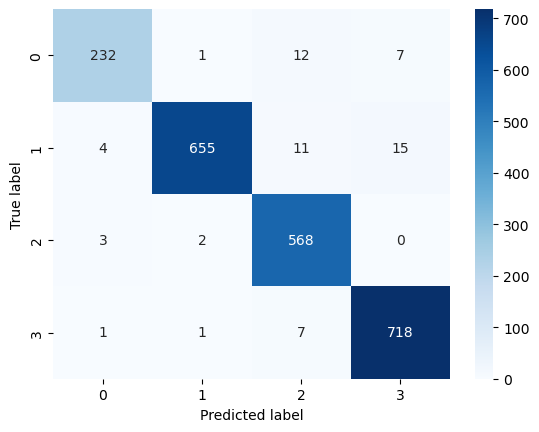

              precision    recall  f1-score   support

 anthrophony       0.97      0.92      0.94       252
    biophony       0.99      0.96      0.97       685
    geophony       0.95      0.99      0.97       573
       other       0.97      0.99      0.98       727

    accuracy                           0.97      2237
   macro avg       0.97      0.96      0.97      2237
weighted avg       0.97      0.97      0.97      2237

{'fit_time': array([0.01050043, 0.01049876, 0.00999808, 0.01150036, 0.00799918,
       0.00849986, 0.00800085, 0.00950003, 0.01099968, 0.0079999 ]), 'score_time': array([0.00200105, 0.00200152, 0.00150013, 0.00150108, 0.00200009,
       0.00150084, 0.00199866, 0.00199986, 0.00150061, 0.00149989]), 'test_accuracy': array([0.92857143, 0.91517857, 0.92410714, 0.95089286, 0.92410714,
       0.95535714, 0.83482143, 0.9103139 , 0.92376682, 0.89686099]), 'test_precision_macro': array([0.91766976, 0.89301802, 0.90392934, 0.94493574, 0.90124777,
       0.94275695, 0.8

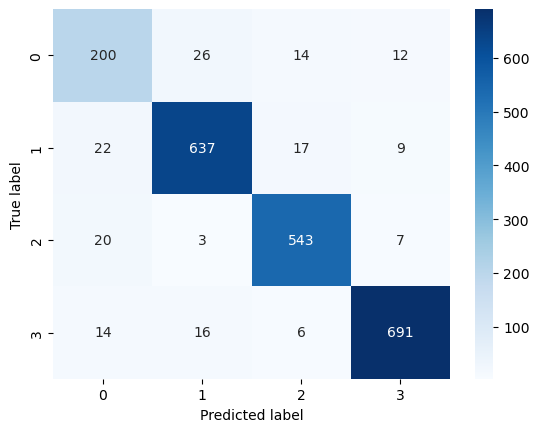

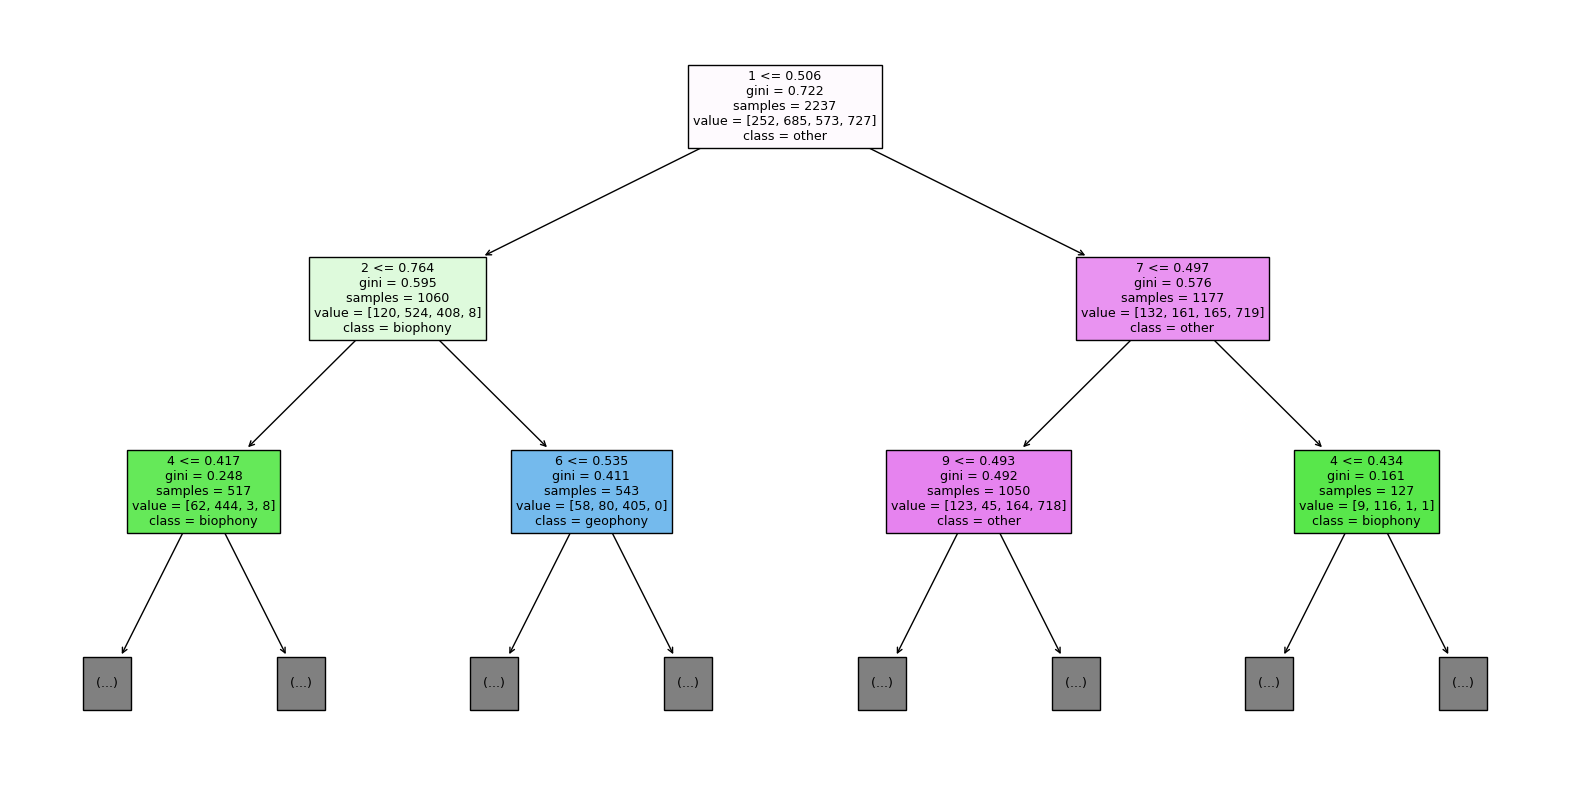

Feature importances: [0.00738381 0.20031079 0.18510771 0.04732042 0.05083956 0.05538385
 0.1280274  0.10445105 0.03763384 0.14946186 0.00827577 0.01072537
 0.01507858]
              precision    recall  f1-score   support

 anthrophony       0.78      0.79      0.79       252
    biophony       0.93      0.93      0.93       685
    geophony       0.94      0.95      0.94       573
       other       0.96      0.95      0.96       727

    accuracy                           0.93      2237
   macro avg       0.90      0.91      0.90      2237
weighted avg       0.93      0.93      0.93      2237

{'fit_time': array([0.00350165, 0.00299859, 0.00300169, 0.00300145, 0.00300074,
       0.00300193, 0.00300026, 0.00300002, 0.00299883, 0.00299907]), 'score_time': array([0.00550032, 0.00599957, 0.00549817, 0.00549889, 0.00549865,
       0.00549841, 0.00649953, 0.00600123, 0.00550008, 0.00550151]), 'test_accuracy': array([1.        , 0.98214286, 0.98214286, 0.98214286, 0.97321429,
       0.97321

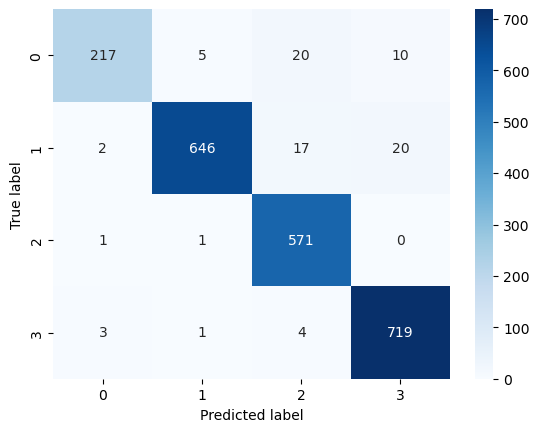

              precision    recall  f1-score   support

 anthrophony       0.97      0.86      0.91       252
    biophony       0.99      0.94      0.97       685
    geophony       0.93      1.00      0.96       573
       other       0.96      0.99      0.97       727

    accuracy                           0.96      2237
   macro avg       0.96      0.95      0.95      2237
weighted avg       0.96      0.96      0.96      2237

{'fit_time': array([0.00150037, 0.00149989, 0.00100064, 0.00149989, 0.0014987 ,
       0.00149989, 0.0010004 , 0.00099993, 0.00100017, 0.00100136]), 'score_time': array([0.00149965, 0.00150061, 0.0019989 , 0.00150108, 0.00150037,
       0.00149941, 0.00149989, 0.00199986, 0.00199986, 0.0019989 ]), 'test_accuracy': array([0.94642857, 0.88392857, 0.90178571, 0.98660714, 0.92857143,
       0.88839286, 0.84375   , 0.85201794, 0.93273543, 0.74887892]), 'test_precision_macro': array([0.93663698, 0.86209127, 0.88469077, 0.98784895, 0.91077015,
       0.86373874, 0.8

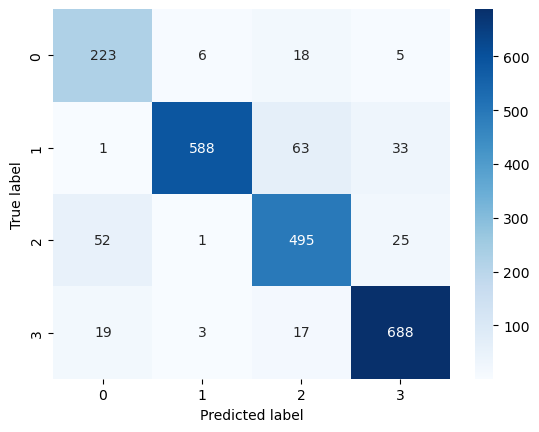

              precision    recall  f1-score   support

 anthrophony       0.76      0.88      0.82       252
    biophony       0.98      0.86      0.92       685
    geophony       0.83      0.86      0.85       573
       other       0.92      0.95      0.93       727

    accuracy                           0.89      2237
   macro avg       0.87      0.89      0.88      2237
weighted avg       0.90      0.89      0.89      2237



In [28]:
from sklearn import svm, tree
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

classifiers = {
    'SVM': svm.SVC(),
    'DT': tree.DecisionTreeClassifier(),
    #'ANN': MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2)),
    'kNN': KNeighborsClassifier(n_neighbors=5),
    'Bayes': GaussianNB()
}

scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

for name, clf in classifiers.items():
    cv_results = cross_validate(clf, X, y, cv=10, scoring=scoring)
    print(cv_results)
    acc = cv_results['test_accuracy'].mean()
    precision = cv_results['test_precision_macro'].mean()
    recall = cv_results['test_recall_macro'].mean()
    f1 = cv_results['test_f1_macro'].mean()
    print(f"{name}: Accuracy={acc:.4f}, Precision={precision:.4f}, Recall={recall:.4f}, F1-Score={f1:.4f}")

    y_pred = cross_val_predict(clf, X, y, cv=10)
    cm = confusion_matrix(y, y_pred)
    plt.figure()
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()
    # Generate decision tree diagram and feature importance for DT classifier
    if name == 'DT':
        clf.fit(X, y)  # Fit the model before accessing feature importances
        plt.figure(figsize=(20, 10))
        plot_tree(clf, filled=True, feature_names=X.columns, class_names=target_names, max_depth=2)
        plt.show()
        print(f"Feature importances: {clf.feature_importances_}")
    
    print(classification_report(y, y_pred, target_names=target_names))